In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from random_matrix import generate_matrix, print_matrix

In [2]:
'''
This Branch and Bound function removed the condition that check for the cost
of newly created node
'''
def find_least_cost(cost_matrix):
    worker_length = len(cost_matrix)
    lower_bound = float('inf')
    assignment_result = []

    iteration = 0
    combination = 0

    unpruned_nodes = [(0, [], list(range(worker_length)))] 
    
    while unpruned_nodes:
        cost, assignment, unassigned = unpruned_nodes.pop()
        iteration += 1

        if not unassigned:
            combination += 1 
            if cost < lower_bound:
                lower_bound = cost 
                assignment_result = assignment 
            continue

        for job in unassigned:
            new_assignment = assignment + [job] 
            new_unassigned = [j for j in unassigned if j != job]
            new_cost = calculate_cost(cost_matrix, new_assignment)
            unpruned_nodes.append((new_cost, new_assignment, new_unassigned))  

    # print(f"{iteration} Iterations and {combination} combinations") # For debugging
    return lower_bound, assignment_result

def calculate_cost(matrix, assignment):
    cost = 0
    for worker, job in enumerate(assignment):
        cost += matrix[worker][job]
    return cost

In [4]:
# dummy input
# output should be
# worker 0 -> job 1
# worker 1 -> job 0
# worker 2 -> job 2
# worker 3 -> job 3
# optimal cost = 13
input_data = np.array([
#job 0, 1, 2, 3 
    [9, 2, 7, 8], # Worker 0
    [6, 4, 3, 7], # Worker 1
    [5, 8, 1, 8], # Worker 2
    [7, 6, 9, 4]  # Worker 3
])
start = time.time()
solution, assignment = find_least_cost(input_data)
end = time.time()
print("Optimal Solution:", solution)
print("Optimal Assignment:", assignment)
print("Time Took :", end-start, "s")

65 Iterations and 24 combinations
Optimal Solution: 13
Optimal Assignment: [1, 0, 2, 3]
Time Took : 0.0009610652923583984 s


In [10]:
def test_bnb(size_input, dbg):
    execution_times = []
    for size in size_input:
        print(f"Input size : {size}")
        data = generate_matrix(size)
        start = time.time()
        solution, assignment = find_least_cost(data)
        end = time.time()
        execution_time = end - start
        
        if dbg:
            print_matrix(data)
            print("Optimal Solution:", solution)
            print("Optimal Assignment:", assignment)    
        print("Time Took :", f"{execution_time:.6f}s\n")
        execution_times.append(execution_time)
    return execution_times

In [11]:
input_size = [size for size in range(1, 13)]
execution_times = test_bnb(input_size, False)
print(execution_times)

Input size : 1
2 Iterations and 1 combinations
Time Took : 0.000000s

Input size : 2
5 Iterations and 2 combinations
Time Took : 0.000000s

Input size : 3
16 Iterations and 6 combinations
Time Took : 0.000000s

Input size : 4
65 Iterations and 24 combinations
Time Took : 0.000000s

Input size : 5
326 Iterations and 120 combinations
Time Took : 0.002000s

Input size : 6
1957 Iterations and 720 combinations
Time Took : 0.001494s

Input size : 7
13700 Iterations and 5040 combinations
Time Took : 0.011283s

Input size : 8
109601 Iterations and 40320 combinations
Time Took : 0.094650s

Input size : 9
986410 Iterations and 362880 combinations
Time Took : 0.874492s

Input size : 10
9864101 Iterations and 3628800 combinations
Time Took : 9.152874s

Input size : 11
108505112 Iterations and 39916800 combinations
Time Took : 104.115720s

Input size : 12


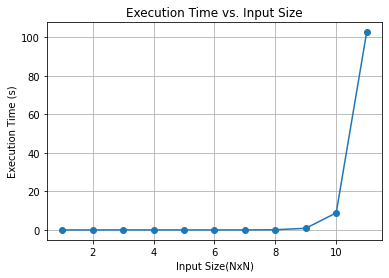

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(input_size, execution_times, marker='o')
plt.title("Execution Time vs. Input Size")
plt.xlabel("Input Size(NxN)")
plt.ylabel("Execution Time (s)")
plt.grid(True)
plt.show()